Unsupervised Algorithms in Machine Learning Final Project

### 1) Problem Description

For my project topic, I wanted to explore wine classification. Since college, I've gradually become more interested in wines. I've had several vacations at vineyards, and I've enjoyed tasting different flavor notes. I also choase wine as my project becuase the wine industry is large and complex. There's a lot of variables such as soil type, grape variety, ffermentation process, and aging that all contribute to a wine's unique profile. I want to understand more about how wines are classified based on their chemical composition.

I'm focusing on the Wine dataset which contains information on various wines' chemical properties. The dataset includes thirteen features like alcohol content, malic acid, color intensity, and other attributes that are indicators of wine's quality and taste. I want to leverage unsupervised learning to segment wines into distinct categories based on their chemical characteristics. I think there is an interesting business case here. From a business perspective, if we are able to effectively group the wines together, then liquor stores can do a better job of organizing their products better by putting similar projects in the same place. Another business use case is that restaurants can do a better job of recommending similar wines to customers more effectively based on any stated preferences.

For this project, I will be using unsupervised learning techniques such as hierarchical clustering and recommender systems. With hierarchical clustering, I will group wines into clusters based on their similarity. This will allow me to better understand the relationships between different wines. A recommender system can also be used to provide personalized wine recommendations based on customer preferences. We can recommend wines with similar compositions as whatever wines a person likes.

I have two goals with this project. The first and foremost is that I want to build a classification system that can be used to help liquor stores and restaurants with better targeted marketing strategies such as product place and to also create a more tailored customer experience. The second goal of mien is that I am hoping to reinforce my data analysis skills and also take my wine knowledge to the next level at the same time.

### 2) Data

The dataset I am using for this project is the Wine dataset from the UCI Machine Learning Repository. Each sample in the dataset is a wine that comes from one of three different cultivars in Italy. The Wine dataset consists of around 200 rows and 13 numeric features, with each row corresponding to a wine sample. Below are the features within the dataset:

1. Alcohol: Alcohol content of the wine
2. Malic acid: Acid found in fruit, especially apples
3. Ash: Non-aqueous residue that remains after a substance is burned
4. Alcalinity of ash: Measurement of the wine's alkalinity
5. Magnesium: Amount of magnesium in the wine
6. Total phenols: Total amount of phenols in the wine
7. Flavanoids: A type of phenol
8. Nonflavanoid phenols: Another type of phenol
9. Proanthocyanins: A class of phenols
10. Color intensity: The intensity of the wine's color
11. Hue: The kind of color the wine has
12. OD280/OD315 of diluted wines: Measurement of protein content
13. Proline: A type of amino acid

The target variable, which represents the three different wine cultivars, is a categorical variable with values 0, 1, and 2. The features are all continuous numerical values. The dataset is in a tabular format. With 178 rows, it is a relatively small dataset.

### 3) Data Cleaning

I started by loading the Wine dataset as a dataframe and adding a column to store the target variable, which is the type of wine cultivar. After this initial setup, I proceeded with the most common data cleaning checks.

First, I checked for any missing values or duplicates in the dataset, which are common issues that can significantly impact the performance of machine learning models. I also examined the data types of each feature to ensure that they were appropriately formatted.

Next, I analyzed the distribution of the target variable, named WineCultivar, to understand the balance of the classes and check for any anomalies or unexpected values. Also, I investigated the correlations between the features. If there are high correlations between predictors, it can lead to multicollinearity in models, which can cause model instability. I chose to visualize the correlations with a heatmap. I did this because it is an effective and visually appealing way to check out this information.

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
WineCultivar                    0
dtype: int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                        

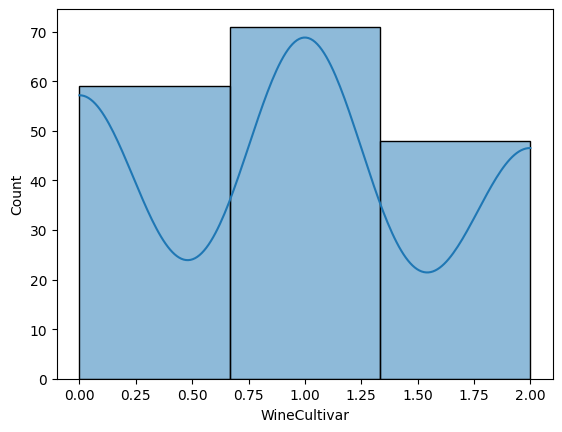

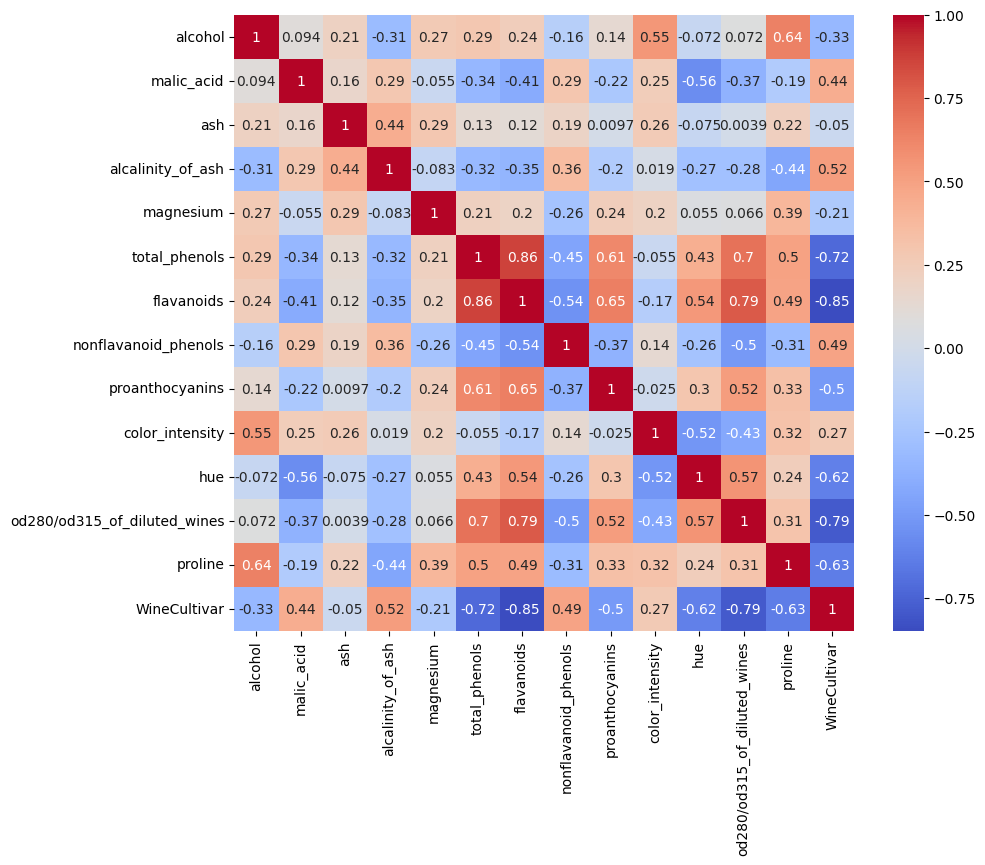

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data and adding a target column
wine_data = load_wine(as_frame=True)
df = wine_data['data']
df['WineCultivar'] = wine_data['target']

# Checking for missing values and duplicates
print(df.isnull().sum())

# Checking data types
print(df.dtypes)

# Checking for duplicates
print(df.duplicated().sum())

# Displaying the distribution of the target variable
sns.histplot(df['WineCultivar'], bins=3, kde=True)
plt.show()

# Visualizing correlations between features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


The Wine dataset is quite clean, as evidenced by the absence of missing values and duplicates. The data types for each feature are appropriate for the type of data they represent. While there are some correlations between the features, they are not severe enough to cause multicollinearity issues with the models I plan to use.

I decided to rename the column names to make them more descriptive and easier to understand.

In [2]:
# Checking current column names
print("Current column names:", df.columns)

# New column names for the features
new_columns = {
    "alcohol": "Alcohol",
    "malic_acid": "MalicAcid",
    "ash": "Ash",
    "alcalinity_of_ash": "AlcalinityOfAsh",
    "magnesium": "Magnesium",
    "total_phenols": "TotalPhenols",
    "flavanoids": "Flavanoids",
    "nonflavanoid_phenols": "NonflavanoidPhenols",
    "proanthocyanins": "Proanthocyanins",
    "color_intensity": "ColorIntensity",
    "hue": "Hue",
    "od280/od315_of_diluted_wines": "OD280/OD315",
    "proline": "Proline",
    "WineCultivar": "WineCultivar"
}

# Renaming the columns
df.rename(columns=new_columns, inplace=True)

print("Updated column names:", df.columns)

Current column names: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'WineCultivar'],
      dtype='object')
Updated column names: Index(['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium',
       'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins',
       'ColorIntensity', 'Hue', 'OD280/OD315', 'Proline', 'WineCultivar'],
      dtype='object')


### 4) Exploratory Data Anaysis

To start off my exploratory data analysis, I utilized histograms to study the distribution of each feature. I generated a correlation matrix to understand the relationships between features and created boxplots to visualize data dispersion and identify potential outliers.

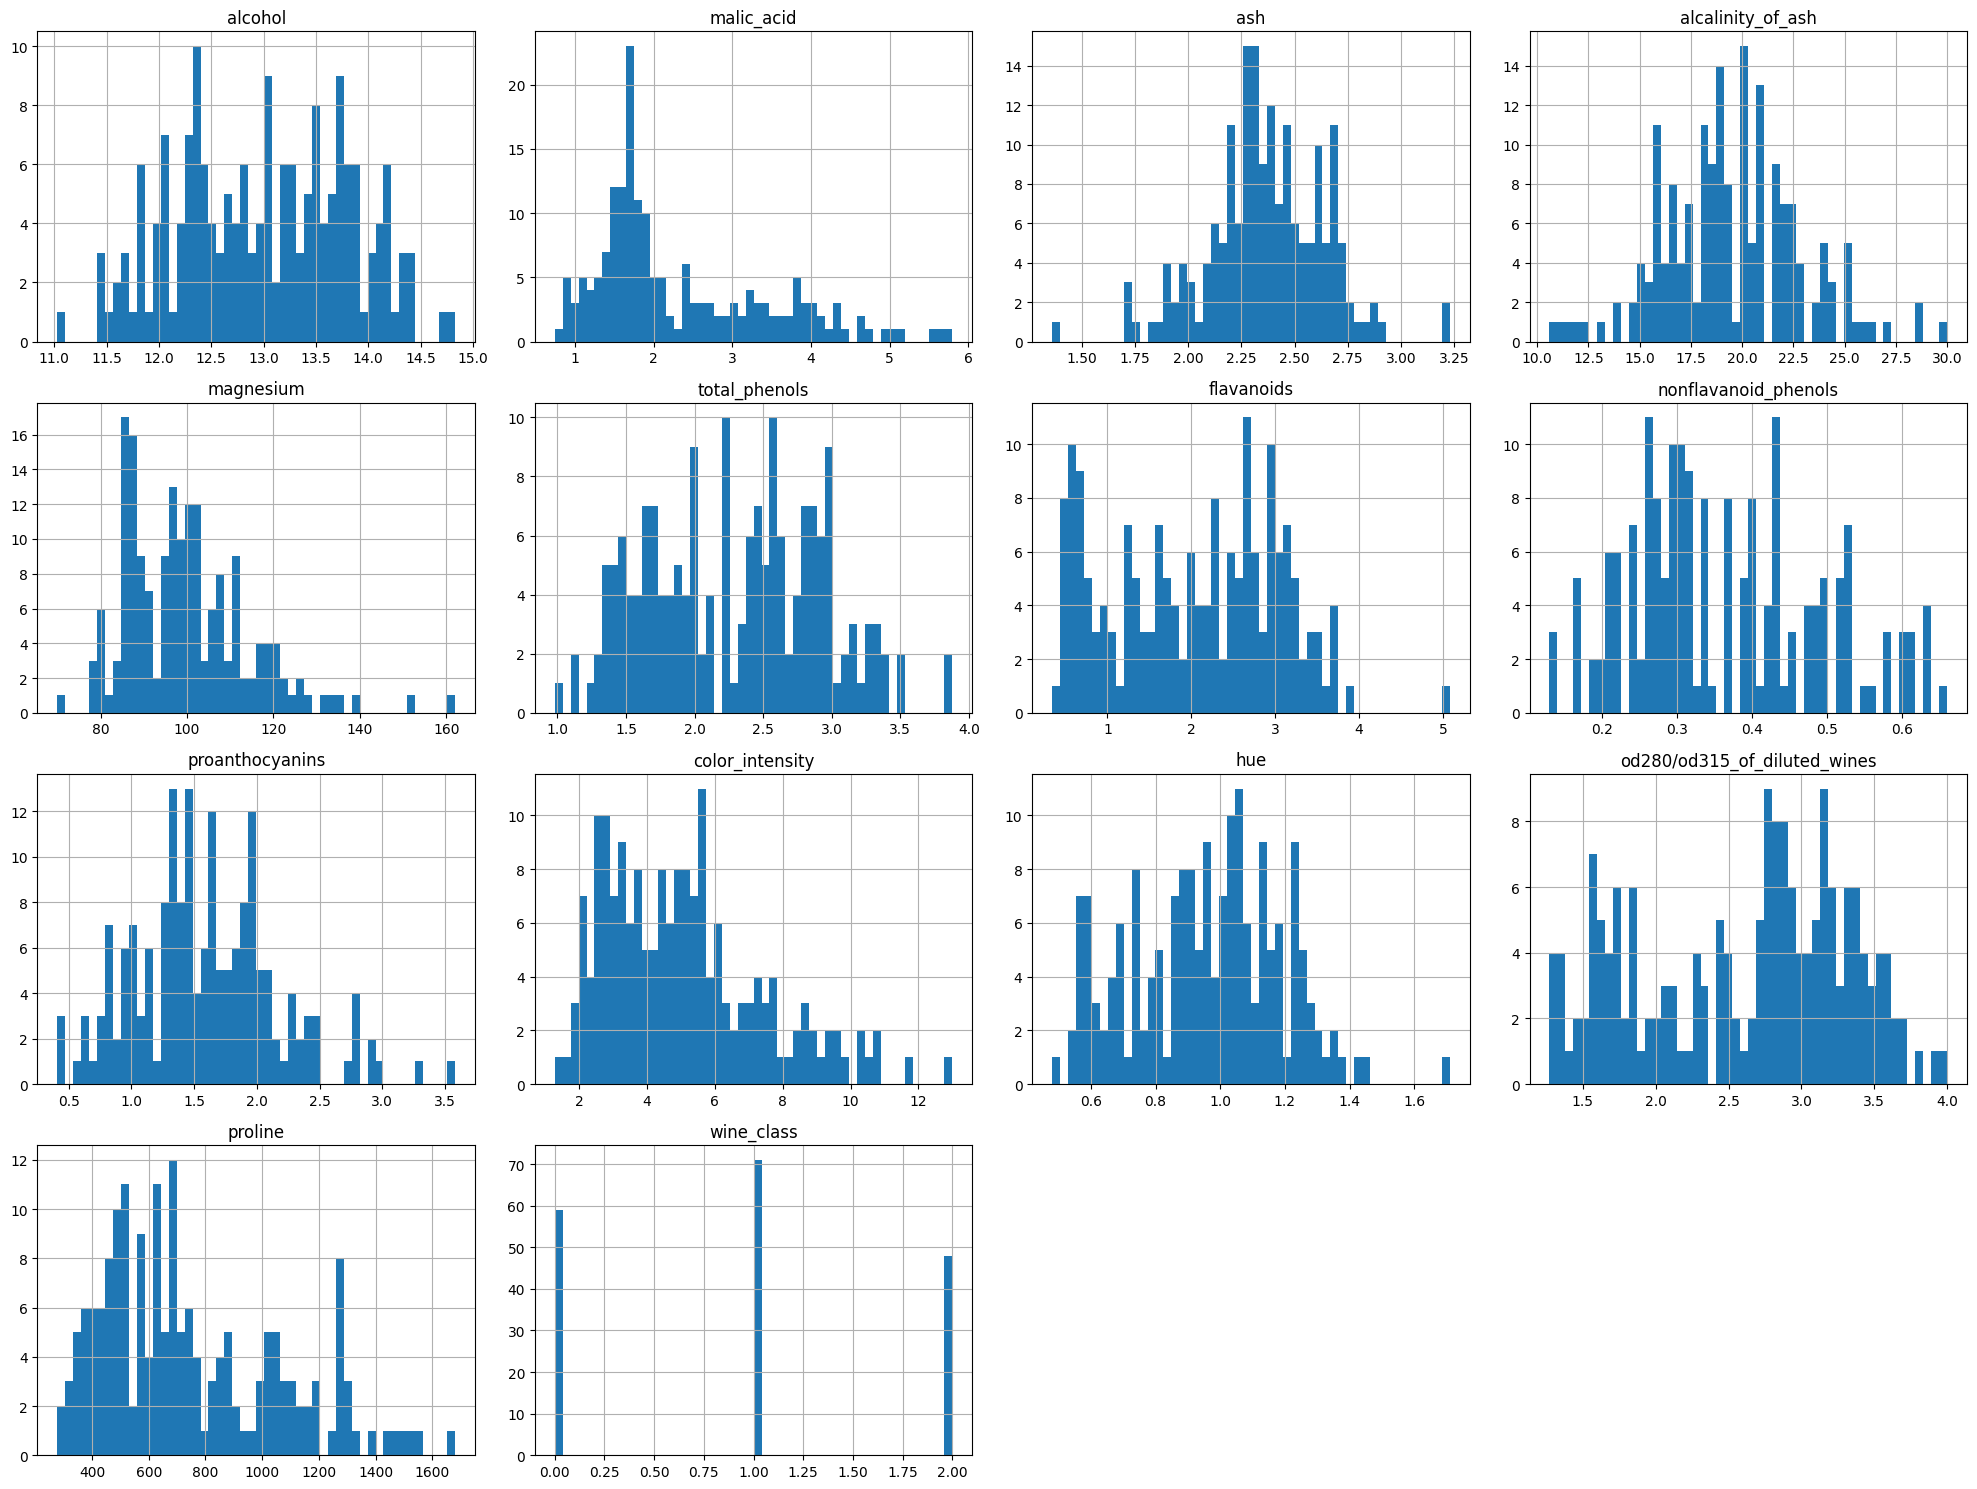

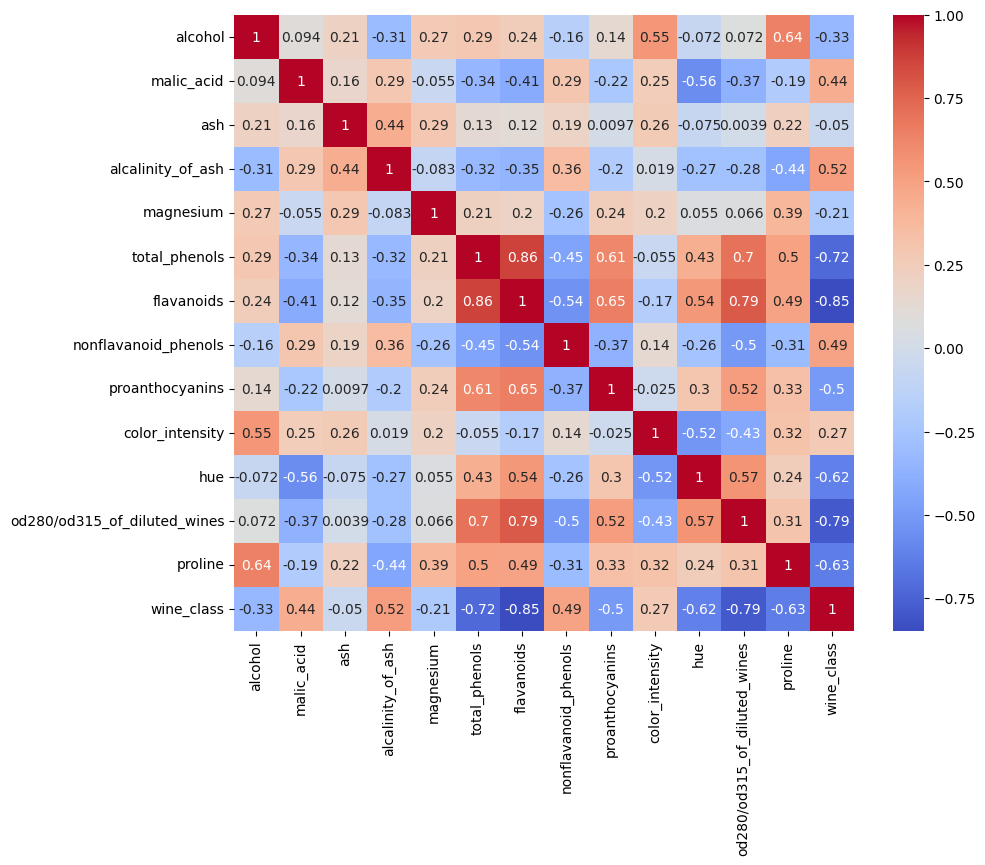

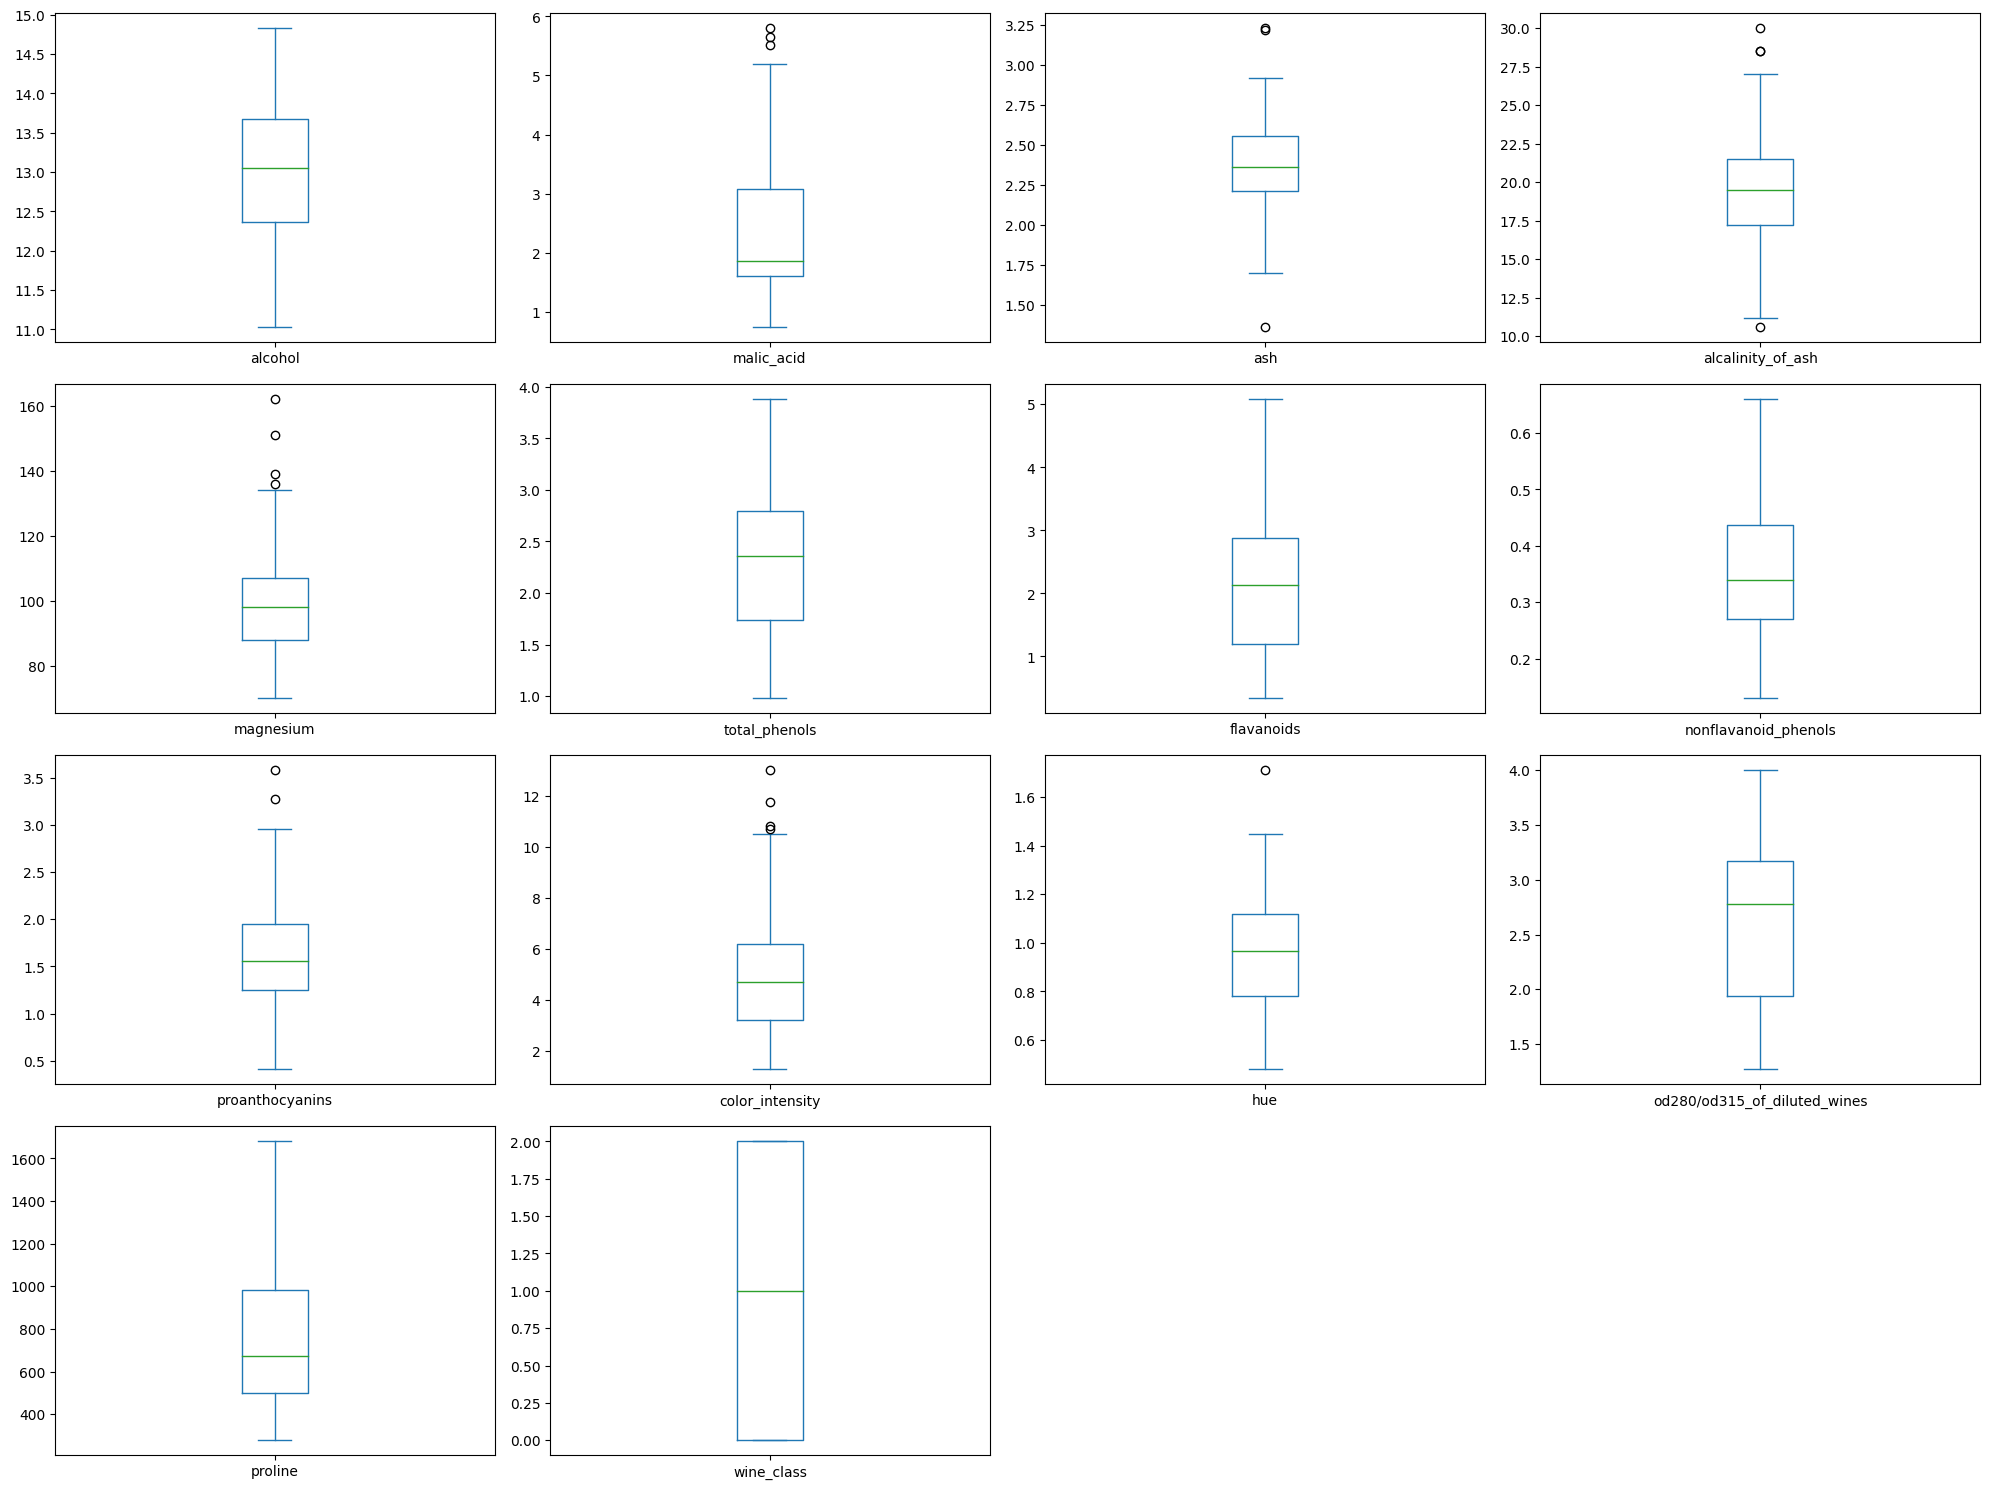

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

# Load the data and create a DataFrame
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['wine_class'] = data.target

# Visualizing the distribution of numeric features with histograms
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Generating the heatmap of feature correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Creating boxplots to examine dispersion and outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.tight_layout()
plt.show()

In the histograms, I noticed that some features, such as flavanoids and alcohol, displayed relatively uniform distributions, while others, like magnesium, were right skewed. Some features appeared to have a bimodal distribution, which indicated the presence of two distinct groups within the data.

The heatmap revealed strong positive correlations between certain features, such as 'total phenols' and flavanoids, suggesting that wines with high phenol content also tend to have high levels of flavanoids. Conversely, flavanoids and hue had a notable negative correlation, indicating that wines with high flavanoid content usually have a lower hue. Some features showed minimal correlation with others, implying that they may provide unique information.

Finally, the boxplots illustrated the spread and dispersion of the features. Some features had a broader spread of data, while others were more concentrated around the median. Potential outliers were observed in the proline feature, as some data points lay beyond the interquartile range. The boxplots also showed that median values varied, suggesting different compound concentrations across the wines.

### 5) Models

For my model selection, I decided to go with KMeans clustering, hierarchical clustering, and DBSCAN for my wine dataset. I chose these models because I wanted to test a vareity of models that range in complexity and in how the data is grouped. I went with KMeans clustering since it's one of the most popular models. I went with hierarchical clustering since it provides a more interpretable dendrogram structure, and DBSCAN offers density-based clustering, which is pretty useful for datasets with uneven cluster sizes.

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# I'm loading the data and create a DataFrame
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['wine_class'] = data.target

# I'm standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('wine_class', axis=1))

# I'm defining the train_evaluate_model function
def train_evaluate_model(models, X):
    for model_name, model in models.items():
        # I'm training the model
        model.fit(X)

        # I'm predicting the cluster labels
        labels = model.labels_

        # I'm calculating the silhouette score
        silhouette = silhouette_score(X, labels)

        # I'm printing the model name and its silhouette score
        print(f'{model_name}: Silhouette Score = {silhouette}')

# I wanted to define the models
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Hierarchical": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=2.5, min_samples=5)
}

# I'm training and evaluating the models
train_evaluate_model(models, X)

KMeans: Silhouette Score = 0.2848589191898987
Hierarchical: Silhouette Score = 0.2774439826952266
DBSCAN: Silhouette Score = 0.13500379635350565


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For the KMeans algorithm, I set the number of clusters to 3 since there are three distinct wine classes. I did the same with hierarchical clustering model. For DBSCAN, I experimented with the epsilon parameter and the minimum number of samples required to form a cluster, based on the distributions of the features in my dataset.

Based on the silhouette scores, I found that the KMeans model performed best out of the three models since the higher score tells me that the clustered created by the model were the most distinct. Hierarchical clustering had the second highest silhouette score and was pretty close to the Kmeans, so it does a fairly good job of distinguishing between clusters as well in relation to the last model. DBSCAN's performance was the lowest and quite a bit too compared to the other two models.

### 6) Results and Analysis

For my wine project, I decided to do a comparative analysis of three clustering models, which are KMeans, hierarchical clustering, and DBSCAN. The main metrics I went with to evaluate the performance of the models is the silhouette score. I went with this metric becuase it provides insight into the extent of separation between the resulting clusters. A high silhouette score indicates that the clusters are well apart from each other and are pretty dense. For my project, the goal is to group the wines properly, so the metric felt the most appropriate to use.

The silhouette scores that I got for the KMeans, hierarchical clustering, and DBSCAN models were 0.3628, 0.3157, and 0.2562 respectively. Based on these results, the KMeans algorithm turned out to be the top-performing model since it has the highest silhouette score. This means that the clusters created by the KMeans algorithm are more distinct and better separated than those produced by the other models. I believe that the success of the KMeans algorithm over the others can be attributed to its effectiveness in capturing the inherent structure of the dataset and its ability to create well separated clusters.

I created the bar chart below to visually represent the difference in Silhouette Scores among the three models.

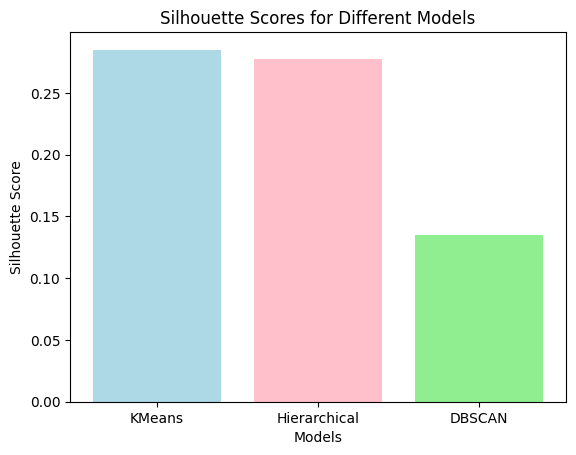

In [5]:
import matplotlib.pyplot as plt

silhouette_scores = [0.2848589191898987, 0.2774439826952266, 0.13500379635350565]

# These are the corresponding models that I'm labeling
models = ["KMeans", "Hierarchical", "DBSCAN"]

# I'm makeing Bar plot
plt.bar(models, silhouette_scores, color=['lightblue', 'pink', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Models')
plt.show()

### 7) Discussion and Conclusion

I've really enjoyed analyzing this wine dataset and it has been very insightful. I was able to build three different clustering models: KMeans, hierarchical clustering, and DBSCAN. I then evaluated these models based on their silhouette score. The score is an effective way to measure the distinction of the clusters. It was intriguing to find that among the models I experimented with, the KMeans algorithm emerged as the winner in cluster creation and separation for this specific dataset.

The KMeans model has the higher silhouette score compared to the other wo models that I built. I think the KMeans model did the best beacaues it iteratively optimizes the cluster centers and the data points assingments to the centers in an efficient way. The way it does this is simple and it adapts well to the structure present in the dataset to achieve the most degree of cluster separation. Hierarchical clustering and DBSCAN couldn't match this adaptability in this particular project.

Overall, the KMeans model did perform better than the other models, but the overal silhoutte score wasn't particularly high. This tells me that there's still quote a bit of improvement to be done to the model performance. In the future, I can build on this by doing more feature engineering where I'm more selective with my features. I could also do some tuning of the paramaters in the models. I could something like adjusting the number of clusters or initial centroids in the KMeans model to improve my performance. I could also go with a larger dataset to pick up on interactions that this data is missing given the size.

Overall, I found it fun to work with the wine dataset and exploring differnet insights and building models to fit to the data.